In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pm = pd.read_excel('PM.xlsx',index_col=0)
pm.index = pd.to_datetime(pm.index,format = "%Y%m")

factors = pd.read_csv('F-F_Research_Data_Factors.csv',skiprows = 3,index_col= 0)[942:1122].astype('float')
factors.index = pd.to_datetime(factors.index,format= '%Y%m')

In [19]:
factors

,Mkt-RF,SMB,HML,RF
2005-01-01,-2.76,-1.72,2.01,0.16
2005-02-01,1.89,-0.55,1.63,0.16
2005-03-01,-1.97,-1.35,2.14,0.21
2005-04-01,-2.61,-3.97,0.05,0.21
2005-05-01,3.65,2.80,-0.66,0.24
...,...,...,...,...
2019-08-01,-2.58,-2.40,-4.85,0.16
2019-09-01,1.43,-1.05,6.77,0.18
2019-10-01,2.06,0.24,-1.88,0.15
2019-11-01,3.87,0.91,-2.05,0.12


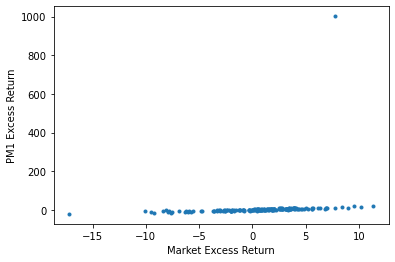

In [26]:
plt.xlabel("Market Excess Return")
plt.ylabel("PM1 Excess Return")
plt.plot(factors['Mkt-RF'],pm['PM1']-factors['RF'],'.')

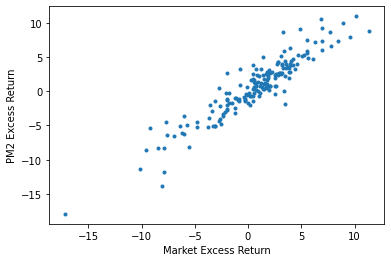

In [28]:
plt.xlabel("Market Excess Return")
plt.ylabel("PM2 Excess Return")
plt.plot(factors['Mkt-RF'],pm['PM2']-factors['RF'],'.')

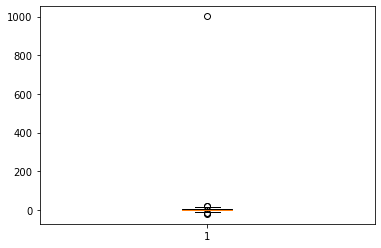

In [31]:
plt.boxplot(pm['PM1'])
plt.show()

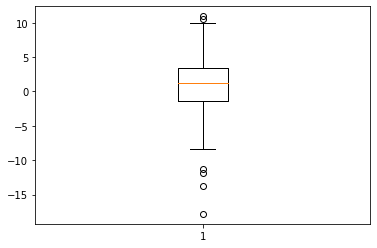

In [32]:
plt.boxplot(pm['PM2'])
plt.show()

As the boxplot shows, PM1 has a significant outlier which has 1000% return for a single month. Compared with her returns on other months, I believe that this is due to data error and I will set the portoflio return of this month equaling to the market return

In [44]:
pm_corrected = pm.copy()
time = pd.to_datetime('20151001')
pm_corrected['PM1'][time] = factors['Mkt-RF'][time] + factors['RF'][time]

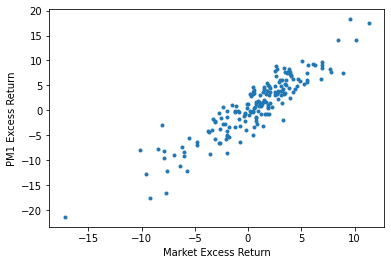

In [45]:
plt.xlabel("Market Excess Return")
plt.ylabel("PM1 Excess Return")
plt.plot(factors['Mkt-RF'],pm_corrected['PM1']-factors['RF'],'.')

In [41]:
pm_corrected

,PM1,PM2
2005-01-01,-6.323035,0.604917
2005-02-01,0.577468,2.323447
2005-03-01,-4.035636,-1.116219
2005-04-01,-6.273516,-1.919915
2005-05-01,7.790274,3.737481
...,...,...
2019-08-01,-1.310561,-4.681369
2019-09-01,-2.886594,5.117690
2019-10-01,3.880102,0.939580
2019-11-01,8.340928,3.512510


In [66]:
print("mean returns: %.4f, %.4f"%(pm_corrected['PM1'].mean(),pm_corrected['PM2'].mean()))

SR1 = (pm_corrected['PM1'] - factors['RF']).mean()*12 / ((pm_corrected['PM1'] - factors['RF']).std()*12**0.5)
SR2 = (pm_corrected['PM2'] - factors['RF']).mean()*12 / ((pm_corrected['PM2'] - factors['RF']).std()*12**0.5)


print("Sharpe Ratio: %.4f, %.4f"%(SR1, SR2))

def mdd(ts:pd.Series):
    returns = ts/100
    cum_value = (returns + 1).cumprod()
    return ((cum_value.cummax() - cum_value)/cum_value.cummax()).max()

def IR(track, bm):
    return (track-bm).mean()*12 / ((track-bm).std()*12**0.5)

print("Maximum Drawdone: %.4f, %.4f"%(mdd(pm_corrected['PM1']), mdd(pm_corrected['PM2'])))

print("information ratio: %.4f, %.4f"%(IR(pm_corrected['PM1'],factors['RF']+factors['Mkt-RF']),IR(pm_corrected['PM2'],factors['RF']+factors['Mkt-RF']) ))

mean returns: 1.1188, 0.8184
Sharpe Ratio: 0.5781, 0.5555
Maximum Drawdone: 0.5240, 0.5447
information ratio: 0.3621, -0.0061


In [95]:
y1 = pm_corrected['PM1']
y2 = pm_corrected['PM2']
x = sm.add_constant(factors[['Mkt-RF', 'SMB', 'HML']])
res1 = sm.OLS(y1,x).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PM1   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6224.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          2.54e-178
Time:                        17:10:06   Log-Likelihood:                -158.53
No. Observations:                 180   AIC:                             325.1
Df Residuals:                     176   BIC:                             337.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0958      0.045      2.132      0.034       0.007       0.184
Mkt-RF         1.2889      0.012    109.288      0.000       1.266       1.312
SMB            0.8039      0.021     38.594      0.000       0.763       0.845
HML           -0.6861      0.018    -38.522      0.000      -0.721      -0.651
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.067
Skew:                          -0.026   Prob(JB):                        0.967
Kurtosis:                       3.079   Cond. No.                         4.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
res2 = sm.OLS(y2,x).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PM2   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1401.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          1.53e-122
Time:                        17:09:46   Log-Likelihood:                -233.90
No. Observations:                 180   AIC:                             475.8
Df Residuals:                     176   BIC:                             488.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2079      0.068      3.045      0.003       0.073       0.343
Mkt-RF         0.9490      0.018     52.940      0.000       0.914       0.984
SMB           -0.1206      0.032     -3.810      0.000      -0.183      -0.058
HML            0.5350      0.027     19.762      0.000       0.482       0.588
==============================================================================
Omnibus:                        0.034   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.097
Skew:                           0.032   Prob(JB):                        0.953
Kurtosis:                       2.906   Cond. No.                         4.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is evidence for the second manager to outperform the market since she has significant alpha relative to the 3-factor model

The evidence for the first manager to outperform the 3-factor model is weaker both in statistical confidence and in absolute level

In [99]:
alpha_1 = res1.params['const']
alpha_2 = res2.params['const']
sigma_1 = ((res1.resid)**2).mean()**0.5
sigma_2 = ((res2.resid)**2).mean()**0.5
IR_1 = alpha_1 / sigma_1
IR_2 = alpha_2 / sigma_2
print("information ratio: %.4f, %.4f"%(IR_1,IR_2))

information ratio: 0.1640, 0.2343


PM1 is better beating the market and generating higher Sharpe Ratio in the benchmark of simpling comparing the portfolio returns and market returns. However, after using the three factor model as the benchmark, PM2 is better generating alpha and providing higher information ratio.